<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/Deep_Learning/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/DeepLearningML/11_chrun_prediction/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(['customerID'],axis='columns',inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
for col in df:
  print(f' {col} : {df[col].unique()}')

 gender : ['Female' 'Male']
 SeniorCitizen : [0 1]
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No phone service' 'No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes' 'No internet service']
 OnlineBackup : ['Yes' 'No' 'No internet service']
 DeviceProtection : ['No' 'Yes' 'No internet service']
 TechSupport : ['No' 'Yes' 'No internet service']
 StreamingTV : ['No' 'Yes' 'No internet service']
 StreamingMovies : ['No' 'Yes' 'No internet service']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges : [29.85 56.95 53

In [15]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']
for col in df:
  print(f'{col} : {df[col].dtype}')

gender : object
SeniorCitizen : int64
Partner : object
Dependents : object
tenure : int64
PhoneService : object
MultipleLines : object
InternetService : object
OnlineSecurity : object
OnlineBackup : object
DeviceProtection : object
TechSupport : object
StreamingTV : object
StreamingMovies : object
Contract : object
PaperlessBilling : object
PaymentMethod : object
MonthlyCharges : float64
TotalCharges : object
Churn : object


In [29]:
df[df['TotalCharges']==" "].shape

(11, 20)

In [31]:
df.shape

(7043, 20)

In [30]:
df1 = df[df['TotalCharges']!=" "]
df1.shape

(7032, 20)

In [40]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

<ipython-input-40-cffe5c08e1e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [41]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

<ipython-input-44-c345fa0eaaf0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])


In [45]:
for col in df1:
  print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetServic

In [46]:
df1.replace('No internet service','No',inplace=True)

<ipython-input-46-6ec62bd94ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [47]:
df1.replace('No phone service','No',inplace=True)

<ipython-input-47-1b1036926b6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [49]:
df1.replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-49-350a78ab38d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Yes': 1, 'No': 0}, inplace=True)


In [59]:
col_to_encode = ['InternetService','Contract','PaymentMethod']
dummies = pd.get_dummies(df1[col_to_encode],drop_first=True)
df1 = pd.concat([df1,dummies],axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,0.000000,0,0,DSL,0,1,...,0.115423,0.001275,0,1,0,0,0,0,1,0
1,Male,0,0,0,0.464789,1,0,DSL,1,0,...,0.385075,0.215867,0,1,0,1,0,0,0,1
2,Male,0,0,0,0.014085,1,0,DSL,1,1,...,0.354229,0.010310,1,1,0,0,0,0,0,1
3,Male,0,0,0,0.619718,0,0,DSL,1,0,...,0.239303,0.210241,0,1,0,1,0,0,0,0
4,Female,0,0,0,0.014085,1,0,Fiber optic,0,0,...,0.521891,0.015330,1,0,1,0,0,0,1,0


In [61]:
df1.drop(col_to_encode ,axis=1 ,inplace = True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,1,0,0,0,0,1,0
1,Male,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,1,0,1,0,0,0,1
2,Male,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,1,0,0,0,0,0,1
3,Male,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,1,0,1,0,0,0,0
4,Female,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,0,1,0,0,0,1,0


In [63]:
df1.replace({'Female' : 1 , 'Male' : 0}, inplace=True)
for col in df1:
  print(f'{col} : {df1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [64]:
import tensorflow as tf
from tensorflow import keras

In [65]:
X = df1.drop('Churn',axis=1)
y = df1.Churn

In [66]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [67]:
len(X_train)

5625

In [68]:
len(X_test)

1407

In [69]:
X_train.shape

(5625, 23)

In [72]:
model = keras.Sequential([
    keras.layers.Dense(23,input_shape=(23,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7001
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.7904
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.7952
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8087
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8064
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accura

In [73]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7733


[0.4968230128288269, 0.7732764482498169]

In [74]:
yp = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [75]:
yp[:5]

array([[0.15197313],
       [0.40386587],
       [0.00903882],
       [0.8820764 ],
       [0.3679116 ]], dtype=float32)

In [76]:
y_pred = []
for i in yp:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [77]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [78]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

Text(95.72222222222221, 0.5, 'Truth')

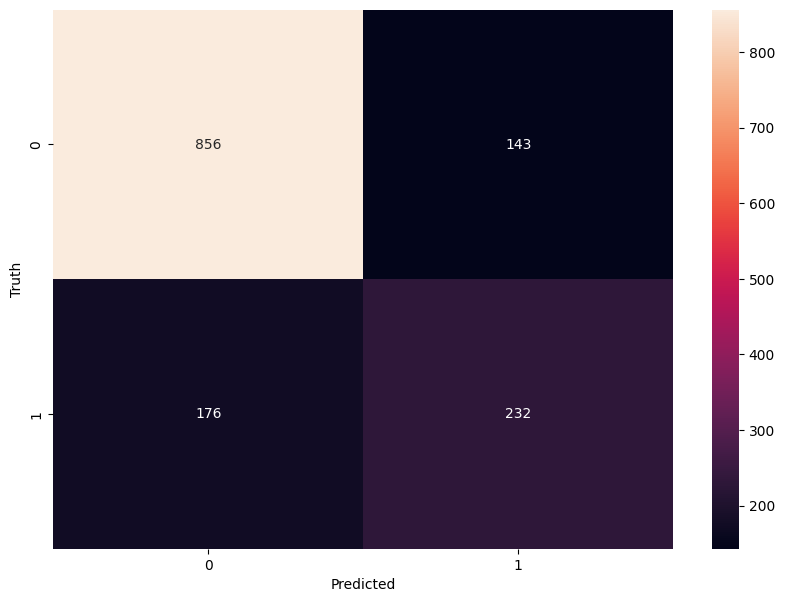

In [79]:
from ast import increment_lineno
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.57      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



In [94]:
#precision '0'
round(856/(856+176),2)

0.83

In [95]:
#precision '1'
round(232/(232+143),2)

0.62

In [90]:
#Recall '0'
round(856/(856+143),2)

0.86

In [91]:
#Recall '1'
round(232/(232+176),2)

0.57

In [92]:
# F1-score '0'
round(2*0.83*0.86/(0.83+0.86),2)

0.84

In [93]:
# F1-score '1'
round(2*0.62*0.57/(0.62+0.57),2)

0.59